# 数据来源： http://archive.ics.uci.edu/ml/datasets/credit+approval
主要说明数据的处理。数据已经被处理成与原始意义无关的样子。  
1.样例数: 690  
2.特征数: 15 + 样本类型  
3.特征信息:  
A1: b, a.  
A2: continuous.  
A3: continuous.  
A4: u, y, l, t.  
A5: g, p, gg.  
A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.  
A7: v, h, bb, j, n, z, dd, ff, o.  
A8: continuous.  
A9: t, f.  
A10: t, f.  
A11: continuous.  
A12: t, f.  
A13: g, p, s.  
A14: continuous.  
A15: continuous.  
A16: +,- (class attribute)  


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
cc_apps = pd.read_csv("data.csv", header=None)
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [3]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


查看数据时发现有部分值为‘？’的空缺，统计空缺值。

In [4]:
cc_apps.eq('?').sum()

D:\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

对空缺值处理，由于空缺值不仅有数值型，还有字符型，不想直接去除，决定用比较常用的平均值的方式来代替数值型空缺值，用出现次数最多的字符代替空缺的字符型。

In [5]:
bestfill = []
cc_apps = cc_apps.replace("?",np.NaN)
cc_apps = cc_apps.fillna(cc_apps.mean())
for col in cc_apps.columns:
    if cc_apps[col].dtypes == 'object':
        cc_apps[col] = cc_apps[col].fillna(cc_apps[col].value_counts().index[0])

对字符进行数字化。

In [6]:
le = LabelEncoder()
for col in cc_apps.columns:
    if cc_apps[col].dtype=='object':
        cc_apps[col]=le.fit_transform(cc_apps[col])
        
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,42,0,0
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,118,560,0
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,74,824,0
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,1,3,0
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,8,0,0


对数字进行最简单的归一化MinMaxScaler

In [7]:
cc_apps_droped = cc_apps.drop([cc_apps.columns[10],cc_apps.columns[13]], axis=1)
cc_apps_val = cc_apps_droped.values
X,y = cc_apps_val[:,0:13], cc_apps_val[:,13]


scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

对处理好的数据进行模型的应用并分析效果。

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()

logreg.fit(X_train,Y_train)
y_pred = logreg.predict(X_test)

print("Accuracy of logistic regression classifier: ", logreg.score(X_test, Y_test))

confusion_matrix(Y_test, y_pred)




Accuracy of logistic regression classifier:  0.8333333333333334


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[92, 11],
       [27, 98]], dtype=int64)

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

plt.figure(figsize=(12, 9))
sns.set()
f,ax=plt.subplots()
C2= confusion_matrix(Y_test, y_pred, labels=[0, 1])
print(classification_report(Y_test, y_pred, target_names=['0','1']))
print(C2) #打印出来看看
sns.heatmap(C2,annot=True,fmt='.20g',cmap=plt.cm.Blues) #画热力图
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       103
           1       0.90      0.78      0.84       125

    accuracy                           0.83       228
   macro avg       0.84      0.84      0.83       228
weighted avg       0.84      0.83      0.83       228

[[92 11]
 [27 98]]


<Figure size 1200x900 with 0 Axes>

<Figure size 640x480 with 2 Axes>

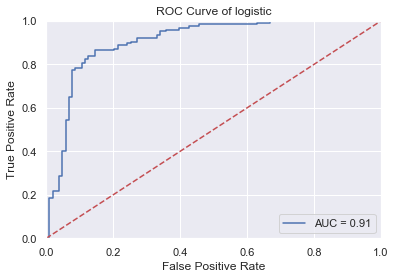

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_scores = logreg.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(Y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of logistic')
plt.show()

In [12]:

tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

param_grid = dict(tol=tol, max_iter=max_iter)

logreg = LogisticRegression()

grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_model_result = grid_model.fit(rescaledX, y)

best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.855072 using {'max_iter': 100, 'tol': 0.01}


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
#YY = Y_train.astype(int)
knn.fit(X_train,Y_train)

y_pred = knn.predict(X_test)

print("Accuracy of KNeighbors classifier: ", knn.score(X_test, Y_test))
#YYY = Y_test.astype(int)

Accuracy of KNeighbors classifier:  0.8640350877192983


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       103
           1       0.90      0.85      0.87       125

    accuracy                           0.86       228
   macro avg       0.86      0.87      0.86       228
weighted avg       0.87      0.86      0.86       228

[[ 91  12]
 [ 19 106]]


<Figure size 864x648 with 0 Axes>

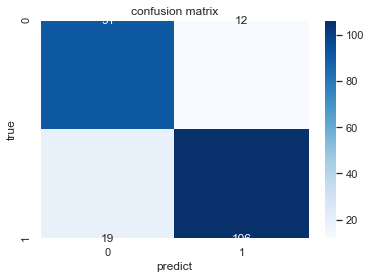

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
sns.set()
f,ax=plt.subplots()
print(classification_report(Y_test, y_pred, target_names=['0','1']))
C2= confusion_matrix(Y_test, y_pred, labels=[0, 1])
print(C2) #打印出来看看
sns.heatmap(C2,annot=True,fmt='.20g',cmap=plt.cm.Blues) #画热力图
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴
plt.show()

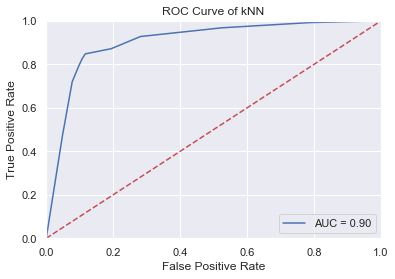

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(Y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [16]:
kf = KFold(n_splits=10, shuffle=True, random_state=10)

acc = []
precision = []
recall = []
F1 = []

for train_index, test_index in kf.split(cc_apps_val):
    train, test = cc_apps_val[train_index], cc_apps_val[test_index]
    
    x_train, x_test = train[:,0:13], test[:,0:13]
    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test)
    y_train, y_test = train[:,13], test[:,13]
    knn.fit(x_train,y_train)
    predictions = knn.predict(x_test)
    TN, FP, FN, TP = confusion_matrix(y_test,predictions).ravel()
    
    acc_fold = (TP+TN)/(TP+FP+TN+FN)
    precision_fold = TP/(TP+FP)
    recall_fold = TP/(TP+FN)
    F1_fold = 2*(precision_fold * recall_fold)/(precision_fold + recall_fold)
    
    acc.append(acc_fold)
    precision.append(precision_fold)
    recall.append(recall_fold)
    F1.append(F1_fold)
    

In [17]:
acc_avg =  np.average(acc)
precision_avg =  np.average(precision)
recall_avg =  np.average(recall)
F1_avg = np.average(F1)

acc_avg

0.8594202898550727

In [18]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

svm_model = svm.SVC(probability=True)
param_grid = {'C':[0.1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}
svm_grid = GridSearchCV(svm_model,param_grid)

#svm_grid.fit(X_train,Y_train)
#y_pred = svm_grid.predict(X_test)

svm_model.fit(X_train,Y_train)
y_pred = svm_model.predict(X_test)

print("Accuracy of SVM classifier: ", svm_model.score(X_test, Y_test))


Accuracy of SVM classifier:  0.8421052631578947


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.77      0.92      0.84       103
           1       0.92      0.78      0.84       125

    accuracy                           0.84       228
   macro avg       0.85      0.85      0.84       228
weighted avg       0.86      0.84      0.84       228

[[95  8]
 [28 97]]


<Figure size 864x648 with 0 Axes>

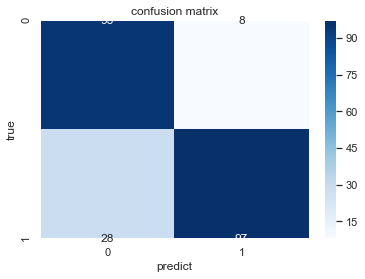

In [19]:
plt.figure(figsize=(12, 9))
sns.set()
f,ax=plt.subplots()
C2= confusion_matrix(Y_test, y_pred, labels=[0, 1])
print(classification_report(Y_test, y_pred, target_names=['0','1']))
print(C2) #打印出来看看
sns.heatmap(C2,annot=True,fmt='.20g',cmap=plt.cm.Blues) #画热力图
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴
plt.show()

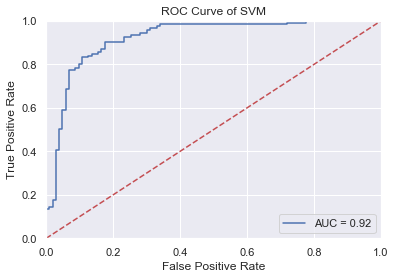

In [20]:
y_scores = svm_model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(Y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVM')
plt.show()

In [21]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

svm_model = svm.SVC()
param_grid = {'C':[0.1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}
svm_grid = GridSearchCV(svm_model,param_grid)

acc = []
precision = []
recall = []
F1 = []

for train_index, test_index in kf.split(cc_apps_val):
    train, test = cc_apps_val[train_index], cc_apps_val[test_index]
    
    x_train, x_test = train[:,0:13], test[:,0:13]
    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test)
    y_train, y_test = train[:,13], test[:,13]
    
    svm_grid.fit(x_train,y_train)
    #print(svm_grid.best_estimator_)
    predictions = svm_grid.predict(x_test)
    
    TN, FP, FN, TP = confusion_matrix(y_test,predictions).ravel()
    
    acc_fold = (TP+TN)/(TP+FP+TN+FN)
    precision_fold = TP/(TP+FP)
    recall_fold = TP/(TP+FN)
    F1_fold = 2*(precision_fold * recall_fold)/(precision_fold + recall_fold)
    
    acc.append(acc_fold)
    precision.append(precision_fold)
    recall.append(recall_fold)
    F1.append(F1_fold)
    
acc_avg =  np.average(acc)
precision_avg =  np.average(precision)
recall_avg =  np.average(recall)
F1_avg = np.average(F1)

acc_avg

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda3\lib\site-packages\sklea

0.855072463768116

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(min_samples_leaf=5)

dtree.fit(X_train,Y_train)
y_pred = dtree.predict(X_test)

print("Accuracy of dtree classifier: ", dtree.score(X_test, Y_test))

Accuracy of dtree classifier:  0.8377192982456141


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       103
           1       0.85      0.86      0.85       125

    accuracy                           0.84       228
   macro avg       0.84      0.84      0.84       228
weighted avg       0.84      0.84      0.84       228

[[ 84  19]
 [ 18 107]]


<Figure size 864x648 with 0 Axes>

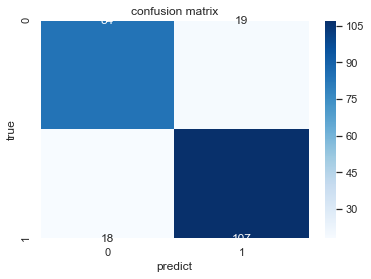

In [23]:
plt.figure(figsize=(12, 9))
sns.set()
f,ax=plt.subplots()
print(classification_report(Y_test, y_pred, target_names=['0','1']))
C2= confusion_matrix(Y_test, y_pred, labels=[0, 1])
print(C2) #打印出来看看
sns.heatmap(C2,annot=True,fmt='.20g',cmap=plt.cm.Blues) #画热力图
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴
plt.show()

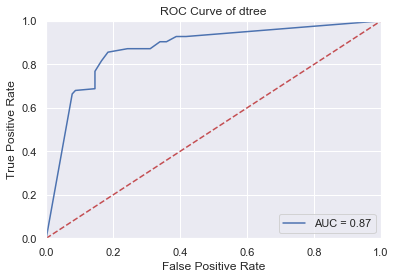

In [24]:
y_scores = dtree.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(Y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of dtree')
plt.show()

In [25]:


acc = []
precision = []
recall = []
F1 = []

for train_index, test_index in kf.split(cc_apps_val):
    train, test = cc_apps_val[train_index], cc_apps_val[test_index]
    
    x_train, x_test = train[:,0:13], test[:,0:13]
    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test)
    y_train, y_test = train[:,13], test[:,13]
    
    dtree.fit(x_train,y_train)
    predictions = dtree.predict(x_test)
    TN, FP, FN, TP = confusion_matrix(y_test,predictions).ravel()
    
    acc_fold = (TP+TN)/(TP+FP+TN+FN)
    precision_fold = TP/(TP+FP)
    recall_fold = TP/(TP+FN)
    F1_fold = 2*(precision_fold * recall_fold)/(precision_fold + recall_fold)
    
    acc.append(acc_fold)
    precision.append(precision_fold)
    recall.append(recall_fold)
    F1.append(F1_fold)


In [26]:
acc_avg =  np.average(acc)
precision_avg =  np.average(precision)
recall_avg =  np.average(recall)
F1_avg = np.average(F1)

F1_avg

0.8565035622072393

In [27]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dtree, out_file=None,
                                feature_names=['Male','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity',
                                                       'YearsEmployed','PriorDefault','Employed','CreditScore',
                                                       'Citizen','Income'],
                                class_names=['Approved','Not Approved'],
                                filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph.view()

'Source.gv.pdf'

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50,min_samples_leaf=20)

rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)

print("Accuracy of rfc classifier: ", rfc.score(X_test, Y_test))

Accuracy of rfc classifier:  0.8333333333333334


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       103
           1       0.85      0.85      0.85       125

    accuracy                           0.83       228
   macro avg       0.83      0.83      0.83       228
weighted avg       0.83      0.83      0.83       228

[[ 84  19]
 [ 19 106]]


<Figure size 864x648 with 0 Axes>

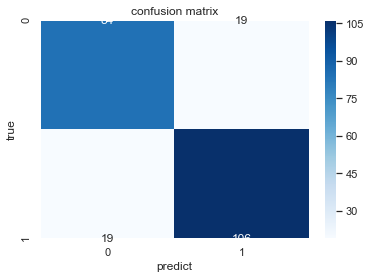

In [29]:
plt.figure(figsize=(12, 9))
sns.set()
f,ax=plt.subplots()
C2= confusion_matrix(Y_test, y_pred, labels=[0, 1])
print(classification_report(Y_test, y_pred, target_names=['0','1']))
print(C2) #打印出来看看
sns.heatmap(C2,annot=True,fmt='.20g',cmap=plt.cm.Blues) #画热力图
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴
plt.show()

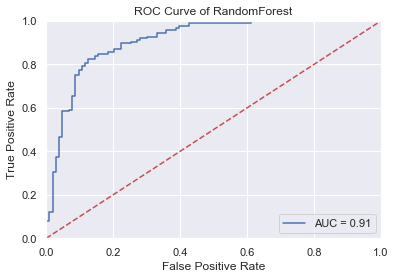

In [30]:
y_scores = rfc.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(Y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of RandomForest')
plt.show()

In [31]:


acc = []
precision = []
recall = []
F1 = []

for train_index, test_index in kf.split(cc_apps_val):
    train, test = cc_apps_val[train_index], cc_apps_val[test_index]
    
    x_train, x_test = train[:,0:13], test[:,0:13]
    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test)
    y_train, y_test = train[:,13], test[:,13]
    
    rfc.fit(x_train,y_train)
    predictions = rfc.predict(x_test)
    
    TN, FP, FN, TP = confusion_matrix(y_test,predictions).ravel()
    
    acc_fold = (TP+TN)/(TP+FP+TN+FN)
    precision_fold = TP/(TP+FP)
    recall_fold = TP/(TP+FN)
    F1_fold = 2*(precision_fold * recall_fold)/(precision_fold + recall_fold)
    
    acc.append(acc_fold)
    precision.append(precision_fold)
    recall.append(recall_fold)
    F1.append(F1_fold)
    

acc_avg =  np.average(acc)
precision_avg =  np.average(precision)
recall_avg =  np.average(recall)
F1_avg = np.average(F1)

acc_avg

0.8507246376811594